- 卷積(Convolutional)把圖像壓縮成一些重要的特徵，用來區分哪些是鞋、手提包或者襯衫，這就是它的作用，卷積運算會改變圖像，強化圖像中的某些特徵。
- 池化(Pooling)是一種壓縮圖像的方式，透過一些運算，這樣就會保留卷積所突出的特徵

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, activations

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
training_images  = training_images / 255.0
test_images = test_images / 255.0
training_images = training_images.reshape(training_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [5]:
visible = Input(shape=(28,28,1))
conv_2d_one = layers.Conv2D(filters=64, kernel_size=(3,3), activation=activations.relu)(visible) # filters 是隨機值
max_pooling_2d_one = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_one) # MaxPooling2D 表示取最大值
conv_2d_two = layers.Conv2D(filters=64, kernel_size=(3,3), activation=activations.relu)(max_pooling_2d_one)
max_pooling_2d_two = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_two)
flatten = layers.Flatten()(max_pooling_2d_two)
dense_three = layers.Dense(128, activation=tf.nn.relu)(flatten) 
output = layers.Dense(10, activation=tf.nn.softmax)(dense_three)
model = Model(inputs=visible, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2049

## Visualizing the Convolutions and Pooling

In [6]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


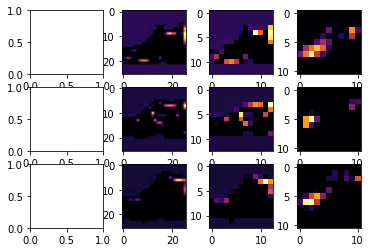

In [23]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 4)
FIRST_IMAGE = 0 # 對應標籤 9
SECOND_IMAGE = 23 # 對應標籤 9
THIRD_IMAGE = 28 # 對應標籤 9
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
for x in range(1,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)